In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')
result=pd.read_csv("../input/Sample_Submission.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


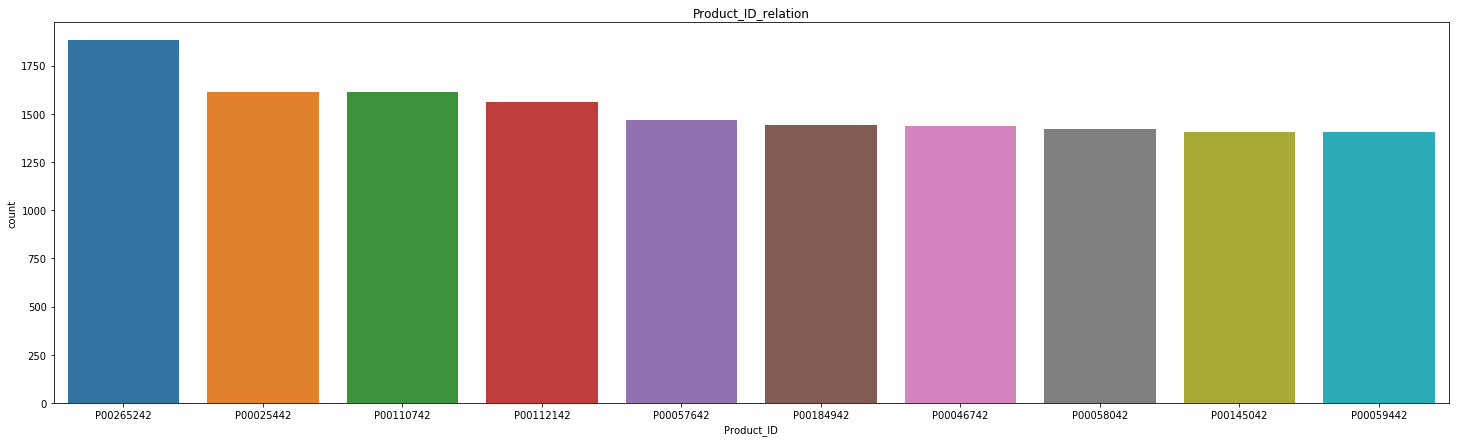

In [5]:
plt.figure(1, figsize=(25,7))
plt.title("Product_ID_relation")
sns.countplot(x = "Product_ID", order=df['Product_ID'].value_counts().index[0:10] ,data=df)

Most Sold Products

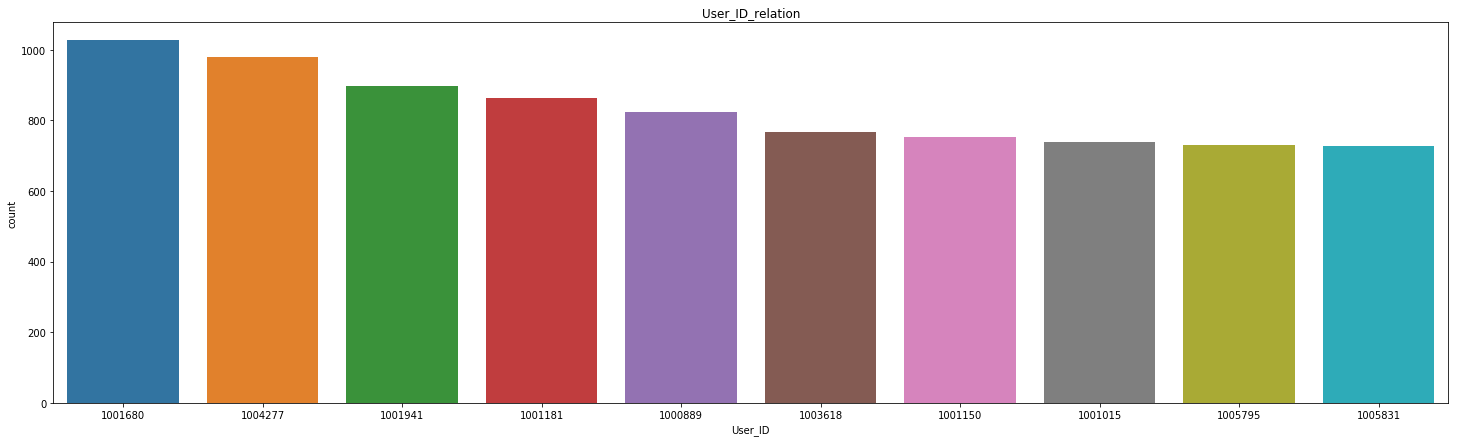

In [6]:
plt.figure(1, figsize=(25,7))
plt.title("User_ID_relation")
sns.countplot(x = "User_ID", order=df['User_ID'].value_counts().index[0:10] ,data=df)

Most Frequently Visiting Users

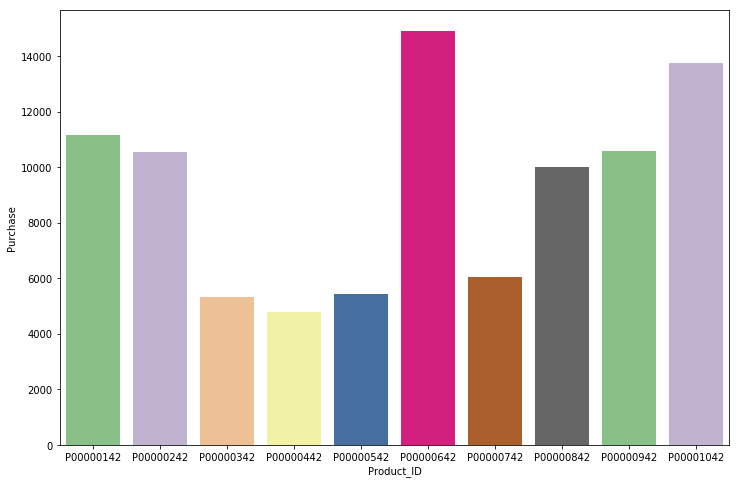

In [7]:
avg_=df.groupby('Product_ID',as_index=False)['Purchase'].mean().head(10)
plt.figure(figsize=(12,8))
sns.barplot(avg_['Product_ID'], avg_['Purchase'], palette='Accent')

In [8]:
avg_=df.groupby('Product_ID',as_index=False)['Purchase'].mean()
df=pd.merge(df,avg_[['Product_ID','Purchase']],on='Product_ID').reset_index()
df.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Purchase_y
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,11870.863436
1,1,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715,11870.863436
2,2,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037,11870.863436
3,3,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009,11870.863436
4,4,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346,11870.863436


In [9]:
test=pd.merge(test,avg_[['Product_ID','Purchase']],on='Product_ID').reset_index()
test.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15781.11859
1,1,1001666,P00128942,M,26-35,14,B,3,0,1,11.0,NaN,15781.11859
2,2,1001948,P00128942,M,0-17,10,B,3,0,1,11.0,NaN,15781.11859
3,3,1003645,P00128942,M,36-45,17,C,4+,1,1,11.0,NaN,15781.11859
4,4,1005253,P00128942,F,55+,13,C,1,0,1,11.0,NaN,15781.11859


In [10]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [11]:
df['Product_count']=getCountVar(df, df, "Product_ID")
df.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Purchase_y,Product_count
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,11870.863436,227
1,1,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715,11870.863436,227
2,2,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037,11870.863436,227
3,3,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009,11870.863436,227
4,4,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346,11870.863436,227


In [12]:
df=df.rename(columns = {"Purchase_x": "Purchase", 
                                  "Purchase_y":"Product_mean"}) 
df.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_mean,Product_count
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,11870.863436,227
1,1,1000149,P00069042,M,26-35,1,B,2,1,3,NaN,NaN,10715,11870.863436,227
2,2,1000541,P00069042,F,18-25,4,C,3,0,3,NaN,NaN,11037,11870.863436,227
3,3,1000698,P00069042,M,18-25,4,A,1,0,3,NaN,NaN,8009,11870.863436,227
4,4,1000951,P00069042,M,46-50,2,B,4+,1,3,NaN,NaN,13346,11870.863436,227


In [13]:
test['Product_count']=getCountVar(test, test, "Product_ID")

In [14]:
test=test.rename(columns = {"Purchase": "Product_mean"}) 
test.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_mean,Product_count
0,0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15781.11859,397
1,1,1001666,P00128942,M,26-35,14,B,3,0,1,11.0,NaN,15781.11859,397
2,2,1001948,P00128942,M,0-17,10,B,3,0,1,11.0,NaN,15781.11859,397
3,3,1003645,P00128942,M,36-45,17,C,4+,1,1,11.0,NaN,15781.11859,397
4,4,1005253,P00128942,F,55+,13,C,1,0,1,11.0,NaN,15781.11859,397


In [15]:
result['User_ID']=test['User_ID']
result['Product_ID']=test['Product_ID']

In [16]:
df=df.drop('Product_ID',axis=1)
test=test.drop('Product_ID',axis=1)

Text(0.5, 1.0, 'Age distribution of all customers')

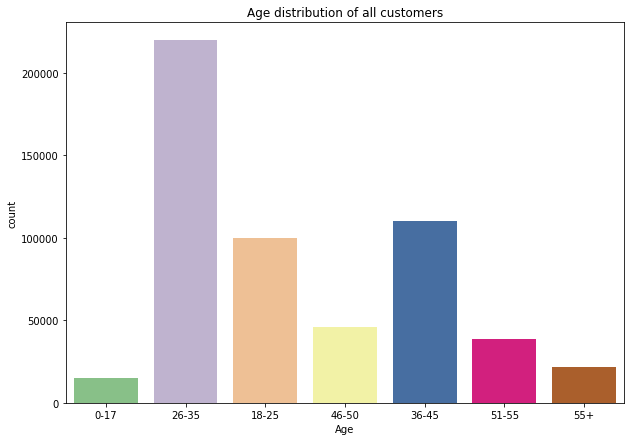

In [17]:
plt.figure(1, figsize=(10, 7))
sns.countplot( x= 'Age', data=df, palette='Accent')
plt.title('Age distribution of all customers')

This shows maximum customers belong to 26-35

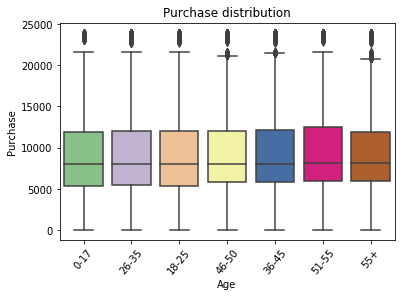

In [18]:
sns.boxplot(x = 'Age', y = 'Purchase', data = df,palette='Accent' )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

51-55 are most spending customers

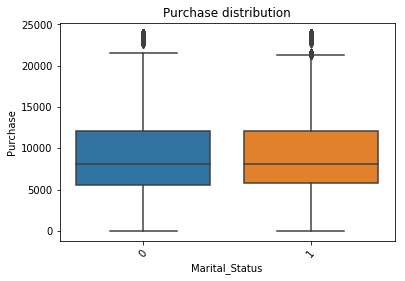

In [19]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

marriage is not much significant in Purchase.

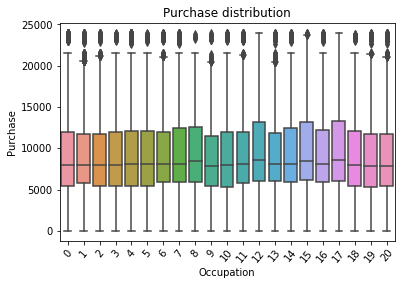

In [20]:
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

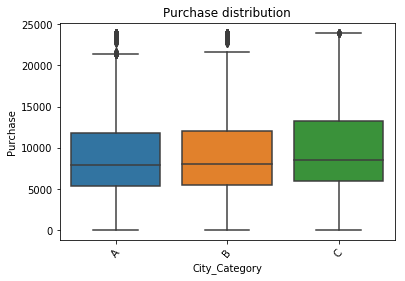

In [21]:
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

People of city C spend most

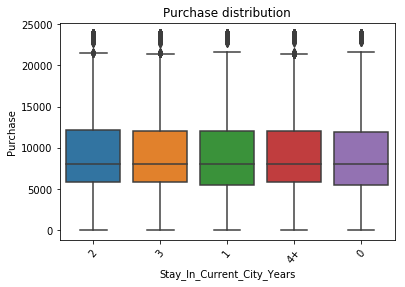

In [22]:
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

Number of years people have lived has no impact

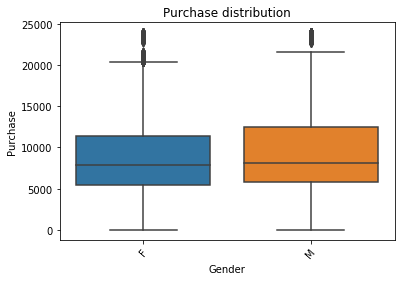

In [23]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

Male spend more but Female have some outliers

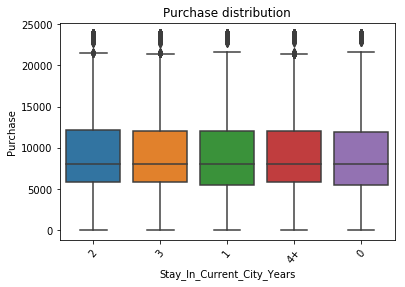

In [24]:
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df )
plt.title('Purchase distribution')
plt.xticks(rotation=50)
plt.show()

In [25]:
df['Gender']=df['Gender'].replace('M',1)
df['Gender']=df['Gender'].replace('F',0)

In [26]:
df['Age']=df['Age'].replace('0-17',15)
df['Age']=df['Age'].replace('18-25',21)
df['Age']=df['Age'].replace('26-35',30)
df['Age']=df['Age'].replace('36-45',40)
df['Age']=df['Age'].replace('46-50',48)
df['Age']=df['Age'].replace('51-55',53)
df['Age']=df['Age'].replace('55+',60)
df['Age']=df['Age'].astype(int)

In [27]:
test['Gender']=test['Gender'].replace('M',1)
test['Gender']=test['Gender'].replace('F',0)

In [28]:
test['Age']=test['Age'].replace('0-17',15)
test['Age']=test['Age'].replace('18-25',21)
test['Age']=test['Age'].replace('26-35',30)
test['Age']=test['Age'].replace('36-45',40)
test['Age']=test['Age'].replace('46-50',48)
test['Age']=test['Age'].replace('51-55',53)
test['Age']=test['Age'].replace('55+',60)
test['Age']=test['Age'].astype(int)

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [30]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

In [31]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode())
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode())

In [32]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mode())
test['Product_Category_3']=test['Product_Category_3'].fillna(test['Product_Category_3'].mode())

In [33]:
df=pd.get_dummies(df,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [34]:
y=df[['Purchase']]
X=df.drop('Purchase',axis=1)

In [35]:
X, test = X.align(test,join='left',axis=1)

In [36]:
test.head()

,index,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_mean,Product_count,City_Category_B,City_Category_C
0,0,1000004,1,48,7,2,1,1,11.0,16.0,15781.11859,397,1,0
1,1,1001666,1,30,14,3,0,1,11.0,NaN,15781.11859,397,1,0
2,2,1001948,1,15,10,3,0,1,11.0,NaN,15781.11859,397,1,0
3,3,1003645,1,40,17,4,1,1,11.0,NaN,15781.11859,397,0,1
4,4,1005253,0,60,13,1,0,1,11.0,NaN,15781.11859,397,0,1


In [37]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=1000,cv=5,
                         objective="reg:linear",
                         nrounds=1000,
                         max_depth=10,
                         eta=0.1,
                         colsample_bytree=0.5,
                         seed=235,
                         metric="rmse",
                         importance=1)

regressor.fit(X,y)

[06:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, cv=5, eta=0.1, gamma=0,
             importance=1, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, metric='rmse', min_child_weight=1,
             missing=None, n_estimators=1000, n_jobs=1, nrounds=1000,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=235, silent=None,
             subsample=1, verbosity=1)

In [38]:
y_pred=regressor.predict(X)

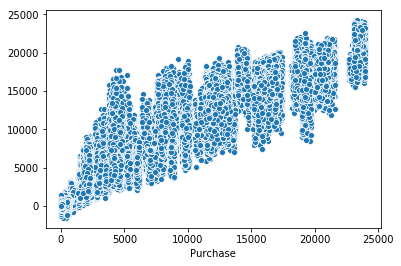

In [39]:
sns.scatterplot(x=y['Purchase'],y=y_pred)

In [40]:
from sklearn import metrics
metrics.r2_score(y,y_pred)

0.850170298148215

In [41]:
result['Purchase']=regressor.predict(test)

In [42]:
for i in result['Purchase']:
    if (i<185):
        result['Purchase']=result['Purchase'].replace(i,185)
    elif (i>23961):
        result['Purchase']=result['Purchase'].replace(i,23961)

In [43]:
result.to_csv("result.csv")

<a href="./result.csv"> Download File </a>

In [44]:
result.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13890.197266
1,1001666,P00128942,12935.018555
2,1001948,P00128942,11619.608398
3,1003645,P00128942,14597.332031
4,1005253,P00128942,15256.787109
